# Ejercicio 3

Implemente el algoritmo de entrenamiento de un SOM bidimensional de forma que se pueda ver gráficamente el mapa topológico durante todo el proceso. Para poder observar el ordenamiento topológico, en el mapa grafique líneas de unión entre pares de neuronas vecinas. Para realizar las pruebas de ordenamiento topológico utilice los patrones provistos en los archivos `circulo.csv` y `te.csv`, considerando en estos casos 1000  ́epocas de entrenamiento como máximo. Dichos datos fueron generados aleatoriamente con distribución uniforme dentro de las siguientes figuras planas:

1. un círculo de radio 1 centrado en el origen
2. Una T

Repita el entrenamiento con los datos en T pero para un SOM unidimensional con la misma cantidad de neuronas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
rng = np.random.default_rng()

In [2]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test),dtype = int)
    M_train = np.zeros((n, n_train),dtype = int)

    for i in range(n):
        idx=np.random.choice(range(ds.shape[0]),ds.shape[0],replace = False)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return (ds, M_test, M_train)

## EJERCICIO CON LA T

In [3]:
ds, testPartitionsIdx, trainPartitionsIdx  =  generar_particiones('gtp2datos/te.csv', 1, 0.2)
NInputs = 2

# Cantidad de patrones para entrenamiento
NPatternsTrain = trainPartitionsIdx.shape[1]

# Generar el vector de entradas para entrenamiento (solo una partición)
X = ds[trainPartitionsIdx[0], :]

# etapa de ordenamiento global

In [9]:
# el mapa es un arreglo cuyos componentes representan las neuronas numeradas fila a fila

nRows = 7                                           # cantidad de filas
nCols = 7                                          # cantidad de columnas
# radio de activación
actRatio = 2    
nepoc=300
learningRate = 0.7

# inicialización de pesos [habría que hacerlo entre -0.5 y 0.5?]
som = rng.random((nRows * nCols, NInputs))
print(som)

[[3.34349461e-01 5.70022066e-01]
 [2.78371274e-01 1.45003458e-01]
 [8.37465261e-01 3.59209591e-02]
 [1.78988150e-01 8.04232568e-01]
 [7.00772928e-01 6.40138124e-01]
 [4.39136019e-01 9.53898251e-01]
 [8.27185033e-01 4.99384234e-01]
 [3.13608286e-01 4.36884316e-01]
 [9.42424654e-01 1.35989846e-01]
 [8.10745863e-01 9.57329906e-01]
 [2.71338874e-01 3.59353465e-01]
 [2.70877767e-01 3.23029570e-01]
 [7.23427552e-01 8.87876149e-01]
 [9.80775457e-01 8.24456972e-01]
 [3.01634385e-01 1.77755892e-01]
 [7.38920526e-02 8.91884185e-02]
 [1.42737939e-01 6.50223210e-01]
 [4.84411706e-01 2.82256582e-01]
 [1.06779632e-02 7.91691933e-01]
 [7.23830141e-01 3.46419071e-01]
 [8.66161724e-01 6.54916111e-01]
 [6.14057905e-01 4.90113173e-02]
 [9.03036966e-02 3.78571897e-01]
 [1.64898315e-01 2.26524295e-01]
 [6.91754668e-01 2.43343555e-01]
 [1.03533603e-01 6.49102511e-01]
 [7.19968044e-01 3.29671272e-02]
 [3.05016270e-01 5.61091745e-01]
 [2.62426950e-01 2.18847529e-01]
 [3.76889508e-02 3.65876234e-02]
 [1.759120

SOM usando un vector: se organiza la numeración de izquierda a derecha, numerando fila a fila

falta el bucle para actualizar los pesos de cada patrón, generar funciones para cada cosa, y hacer las tres etapas bajando los parametros cada vez

In [10]:
som_history = []
for i in range (nepoc):
    for pattern in X:
        
        #búsqueda de la neurona ganadora
        actN = np.argmin(np.linalg.norm(pattern - som, 1, axis = 1))

        #buscar en qué fila cae la neurona
        idxRow = 0; cRow = 0
        for i in range(0, len(som), nCols):
            if actN in range(i, i+nCols):
                idxRow = cRow
                break
            else:
                cRow += 1

        # Adaptación de pesos
        # wj(n) + η(n) (x(n) − wj(n)) de radio de vecindad

        # en la fila de la neurona activa
        # print('neuronas activadas:')
        minIdx = idxRow*nCols
        maxIdx = idxRow*nCols + nCols
        som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] = \
            som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] + \
                learningRate * (pattern - som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)])
        # print(f'fila 0, ({np.clip(actN - actRatio, idxRow*nCols, idxRow*nCols +nCols)}:{np.clip(actN + actRatio + 1, idxRow*nCols, idxRow*nCols + nCols)}]')

        # en las filas hacia arriba y abajo de la neurona activa
        for i in range(1, actRatio + 1):
            # si la fila anterior existe, su índice no es negativo
            if idxRow - i > -1:
                
                minIdx = (idxRow - i) * nCols
                maxIdx = (idxRow - i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN - (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN - (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila - {i}, ({idxIni}:{idxFin}]')
                # actualizo los pesos de la neurona
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])
                # si la fila a siguiente existe, el índice es menor que la cantidad de cols del mapa
            if idxRow + i < nRows:
                minIdx = (idxRow + i) * nCols
                maxIdx = (idxRow + i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN + (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN + (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila + {i}, ({actN + (i * nCols) - (actRatio - i)}:{actN + (i * nCols) + (actRatio - i) + 1}]')
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])
    som_history.append(som.copy())

# etapa de ajuste fino

In [11]:

# radio de activación
actRatio = 0    
nepoc=600
learningRate = 1e-3

In [12]:
for i in range (nepoc):
    for pattern in X:
        
        #búsqueda de la neurona ganadora
        actN = np.argmin(np.linalg.norm(pattern - som, 1, axis = 1))

        #buscar en qué fila cae la neurona
        idxRow = 0; cRow = 0
        for i in range(0, len(som), nCols):
            if actN in range(i, i+nCols):
                idxRow = cRow
                break
            else:
                cRow += 1

        # Adaptación de pesos
        # wj(n) + η(n) (x(n) − wj(n)) de radio de vecindad

        # en la fila de la neurona activa
        # print('neuronas activadas:')
        minIdx = idxRow*nCols
        maxIdx = idxRow*nCols + nCols
        som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] = \
            som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] + \
                learningRate * (pattern - som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)])
        # print(f'fila 0, ({np.clip(actN - actRatio, idxRow*nCols, idxRow*nCols +nCols)}:{np.clip(actN + actRatio + 1, idxRow*nCols, idxRow*nCols + nCols)}]')

        # en las filas hacia arriba y abajo de la neurona activa
        for i in range(1, actRatio + 1):
            # si la fila anterior existe, su índice no es negativo
            if idxRow - i > -1:
                
                minIdx = (idxRow - i) * nCols
                maxIdx = (idxRow - i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN - (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN - (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila - {i}, ({idxIni}:{idxFin}]')
                # actualizo los pesos de la neurona
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])
                # si la fila a siguiente existe, el índice es menor que la cantidad de cols del mapa
            if idxRow + i < nRows:
                minIdx = (idxRow + i) * nCols
                maxIdx = (idxRow + i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN + (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN + (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila + {i}, ({actN + (i * nCols) - (actRatio - i)}:{actN + (i * nCols) + (actRatio - i) + 1}]')
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])

    som_history.append(som.copy())

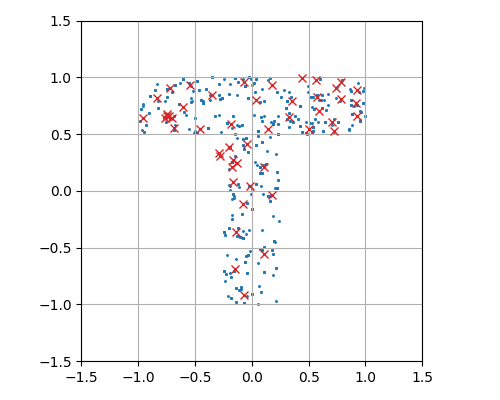

In [13]:
# Animación de la evolución del SOM

import matplotlib.animation as animation
%matplotlib widget

anim_fig = plt.figure(figsize=(5, 4), tight_layout=True)
# anim_fig.suptitle('Evolución de la recta $w_1 x + w_2 y - w_0 = 0$',  fontsize=11)
anim_ax = anim_fig.add_subplot(autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
anim_ax.set_aspect('equal')
anim_ax.grid()

# anim_ax.set_xlabel('$X$')
# anim_ax.set_ylabel('$Y$')

# Patrones
x_x = X[:,0]
x_y = X[:,1]
# x_color = np.where(x_x > 0, 'C0', np.where(x_y > 0, 'C0', 'C1'))

anim_ax.scatter(x_x, x_y, c='C0', s=5, marker='.')

points, = anim_ax.plot(som_history[-1][:,0], som_history[-1][:,1], 'x', c='C3')

# Label para el tiempo transcurrido
# time_template = 'time = %.1fs'
# time_text = anim_ax.text(0.05, 0.92, '', transform=anim_ax.transAxes)

# def animate(i):
#     points.set_data(som_history[i][:,0], som_history[i][:,1])

#     # time_text.set_text(time_template % (t[i])) # Actualizar la label del t

#     return points,

# anim = animation.FuncAnimation(anim_fig, animate, frames=len(som_history), interval=5, repeat=False)
plt.show()

## ejercicio con el circulo

In [ ]:
ds, testPartitionsIdx, trainPartitionsIdx  =  generar_particiones('gtp2datos/circulo.csv', 1, 0.2)
NInputs = 2

# Cantidad de patrones para entrenamiento
NPatternsTrain = trainPartitionsIdx.shape[1]

# Generar el vector de entradas para entrenamiento (solo una partición)
X = ds[trainPartitionsIdx[0], :]

In [ ]:
# el mapa es un arreglo cuyos componentes representan las neuronas numeradas fila a fila

nRows = 7                                           # cantidad de filas
nCols = 7                                          # cantidad de columnas
# radio de activación
actRatio = 2    
nepoc=200
learningRate = 0.7

# inicialización de pesos [habría que hacerlo entre -0.5 y 0.5?]
som = rng.random((nRows * nCols, NInputs))
print(som)

In [ ]:
som_history = []
for i in range (nepoc):
    for pattern in X:
        
        #búsqueda de la neurona ganadora
        actN = np.argmin(np.linalg.norm(pattern - som, 1, axis = 1))

        #buscar en qué fila cae la neurona
        idxRow = 0; cRow = 0
        for i in range(0, len(som), nCols):
            if actN in range(i, i+nCols):
                idxRow = cRow
                break
            else:
                cRow += 1

        # Adaptación de pesos
        # wj(n) + η(n) (x(n) − wj(n)) de radio de vecindad

        # en la fila de la neurona activa
        # print('neuronas activadas:')
        minIdx = idxRow*nCols
        maxIdx = idxRow*nCols + nCols
        som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] = \
            som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] + \
                learningRate * (pattern - som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)])
        # print(f'fila 0, ({np.clip(actN - actRatio, idxRow*nCols, idxRow*nCols +nCols)}:{np.clip(actN + actRatio + 1, idxRow*nCols, idxRow*nCols + nCols)}]')

        # en las filas hacia arriba y abajo de la neurona activa
        for i in range(1, actRatio + 1):
            # si la fila anterior existe, su índice no es negativo
            if idxRow - i > -1:
                
                minIdx = (idxRow - i) * nCols
                maxIdx = (idxRow - i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN - (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN - (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila - {i}, ({idxIni}:{idxFin}]')
                # actualizo los pesos de la neurona
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])
                # si la fila a siguiente existe, el índice es menor que la cantidad de cols del mapa
            if idxRow + i < nRows:
                minIdx = (idxRow + i) * nCols
                maxIdx = (idxRow + i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN + (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN + (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila + {i}, ({actN + (i * nCols) - (actRatio - i)}:{actN + (i * nCols) + (actRatio - i) + 1}]')
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])
    som_history.append(som.copy())

In [ ]:

# radio de activación
actRatio = 0    
nepoc=600
learningRate = 1e-3

In [ ]:
for i in range (nepoc):
    for pattern in X:
        
        #búsqueda de la neurona ganadora
        actN = np.argmin(np.linalg.norm(pattern - som, 1, axis = 1))

        #buscar en qué fila cae la neurona
        idxRow = 0; cRow = 0
        for i in range(0, len(som), nCols):
            if actN in range(i, i+nCols):
                idxRow = cRow
                break
            else:
                cRow += 1

        # Adaptación de pesos
        # wj(n) + η(n) (x(n) − wj(n)) de radio de vecindad

        # en la fila de la neurona activa
        # print('neuronas activadas:')
        minIdx = idxRow*nCols
        maxIdx = idxRow*nCols + nCols
        som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] = \
            som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] + \
                learningRate * (pattern - som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)])
        # print(f'fila 0, ({np.clip(actN - actRatio, idxRow*nCols, idxRow*nCols +nCols)}:{np.clip(actN + actRatio + 1, idxRow*nCols, idxRow*nCols + nCols)}]')

        # en las filas hacia arriba y abajo de la neurona activa
        for i in range(1, actRatio + 1):
            # si la fila anterior existe, su índice no es negativo
            if idxRow - i > -1:
                
                minIdx = (idxRow - i) * nCols
                maxIdx = (idxRow - i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN - (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN - (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila - {i}, ({idxIni}:{idxFin}]')
                # actualizo los pesos de la neurona
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])
                # si la fila a siguiente existe, el índice es menor que la cantidad de cols del mapa
            if idxRow + i < nRows:
                minIdx = (idxRow + i) * nCols
                maxIdx = (idxRow + i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN + (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN + (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila + {i}, ({actN + (i * nCols) - (actRatio - i)}:{actN + (i * nCols) + (actRatio - i) + 1}]')
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])

    som_history.append(som.copy())

In [ ]:
# Animación de la evolución del SOM

import matplotlib.animation as animation
%matplotlib widget

anim_fig = plt.figure(figsize=(5, 4), tight_layout=True)
# anim_fig.suptitle('Evolución de la recta $w_1 x + w_2 y - w_0 = 0$',  fontsize=11)
anim_ax = anim_fig.add_subplot(autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
anim_ax.set_aspect('equal')
anim_ax.grid()

# anim_ax.set_xlabel('$X$')
# anim_ax.set_ylabel('$Y$')

# Patrones
x_x = X[:,0]
x_y = X[:,1]
# x_color = np.where(x_x > 0, 'C0', np.where(x_y > 0, 'C0', 'C1'))

anim_ax.scatter(x_x, x_y, c='C0', s=5, marker='.')

points, = anim_ax.plot(som_history[-1][:,0], som_history[-1][:,1], 'x', c='C3')

# Label para el tiempo transcurrido
# time_template = 'time = %.1fs'
# time_text = anim_ax.text(0.05, 0.92, '', transform=anim_ax.transAxes)

# def animate(i):
#     points.set_data(som_history[i][:,0], som_history[i][:,1])

#     # time_text.set_text(time_template % (t[i])) # Actualizar la label del t

#     return points,

# anim = animation.FuncAnimation(anim_fig, animate, frames=len(som_history), interval=5, repeat=False)
plt.show()